<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Box_plot_and_skewed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('pl.csv')

In [3]:
df.shape

(1000, 3)

<ipython-input-4-dba16731dd87>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


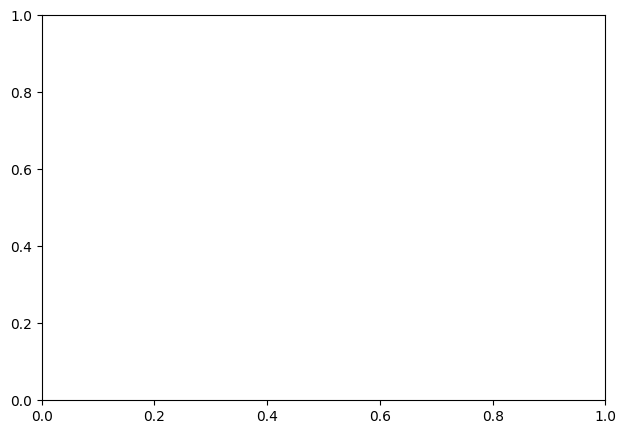

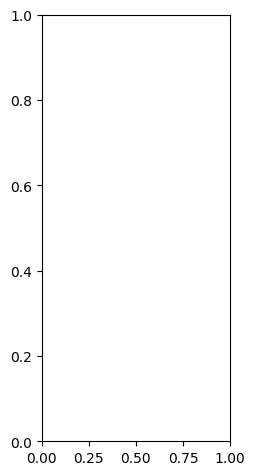

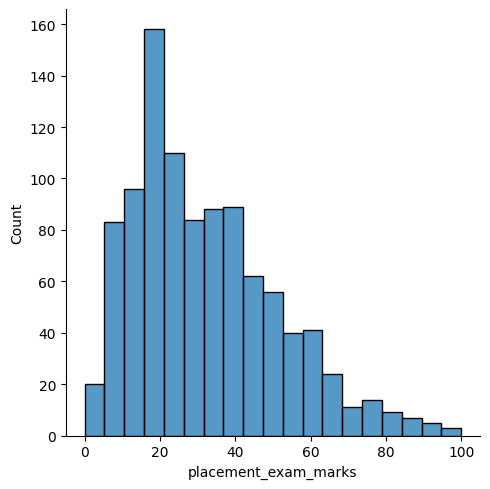

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.displot(df['cgpa'])

plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])

plt.show()

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
41,6.70,38.0,0
84,5.65,35.0,1
644,7.65,29.0,1
999,4.90,10.0,1
240,7.25,38.0,0


In [6]:
print("mean value of cgpa",df['cgpa'].mean())
print("median value of cgpa",df['cgpa'].median())
print("mode value of cgpa",df['cgpa'].mode())
print("standard deviation of cgpa",df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())


mean value of cgpa 6.96124
median value of cgpa 6.96
mode value of cgpa 0    6.67
1    7.09
2    7.19
3    7.33
4    7.46
Name: cgpa, dtype: float64
standard deviation of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [7]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='placement_exam_marks'>

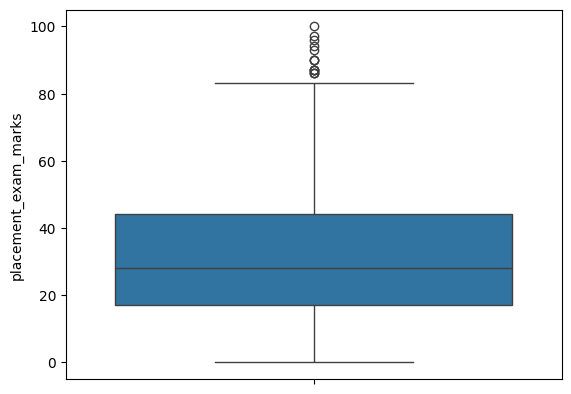

In [9]:
sns.boxplot(df['placement_exam_marks'])

In [10]:
#finding the IQR
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)
IQR=Q3-Q1


In [11]:
Q3

44.0

In [12]:
IQR

27.0

In [13]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [14]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


**Finding Outliers**

In [15]:
df[df['placement_exam_marks']> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df['placement_exam_marks']< lower_limit]

,cgpa,placement_exam_marks,placed


**Trimming**

In [17]:
new_df=df[df['placement_exam_marks']< upper_limit]

In [18]:
new_df.shape

(985, 3)

<ipython-input-19-89592e89c6d0>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)
<ipython-input-19-89592e89c6d0>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


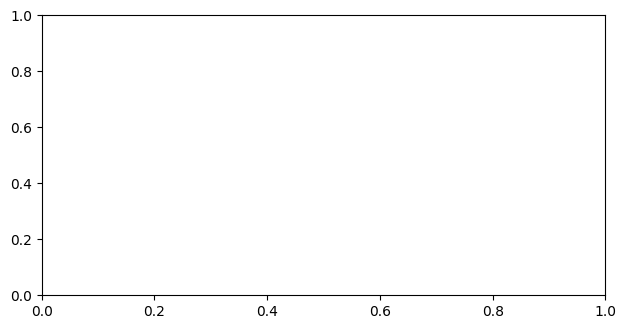

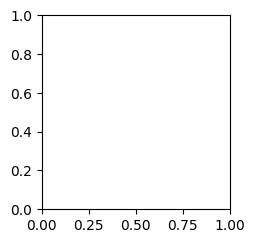

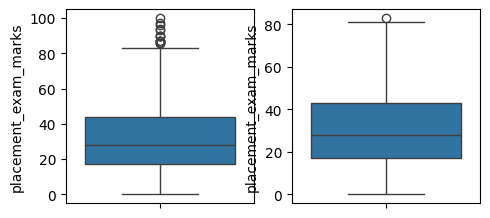

In [19]:
#comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.displot(new_df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [20]:
# capping
df['placement_exam_marks']=np.where(df['placement_exam_marks']>upper_limit,upper_limit,df['placement_exam_marks'])

In [22]:
df.shape

(1000, 3)

<ipython-input-24-d557221ba220>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-24-d557221ba220>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,4)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


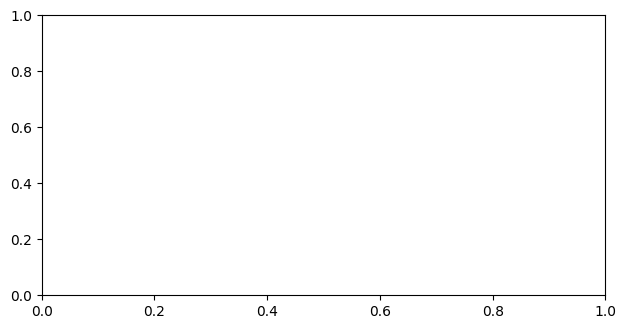

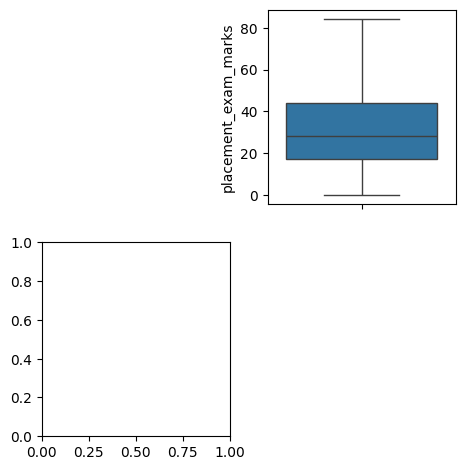

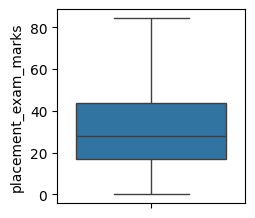

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.displot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.displot(df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df['placement_exam_marks'])

plt.show()